In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import os
# import ssl

# run plots in the notebook
# redid the code to copy a local file, as opening the csv from the url was not working for me due to the ssl error
%matplotlib inline
filename = "./sample-salesv2.csv"
sales = pd.read_csv(filename)

In [96]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [97]:
# Rename the columns to use underscores instead of spaces
sales.columns = ["account_number", "name", "sku", "category", "quantity", "unit_price", "ext_price", "date"]

In [98]:
# Subset the dataframe to contain only the name, category, quantity and unit price columns
subset_ncqp = sales[["name", "category", "quantity", "unit_price"]]
subset_ncqp

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
...,...,...,...,...
995,"Kihn, McClure and Denesik",Belt,11,60.50
996,Kunze Inc,Shoes,16,19.66
997,Waters-Walker,Shoes,13,90.95
998,Huel-Haag,Shoes,9,98.22


In [99]:
# Subset the dataframe to contain only shirt sales
subset_tshirts = sales[sales["category"] == "Shirt"]
subset_tshirts

,account_number,name,sku,category,quantity,unit_price,ext_price,date
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:05
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:28
...,...,...,...,...,...,...,...,...
982,115138,Gorczany-Hahn,VG-32047,Shirt,20,72.35,1447.00,2014-08-11 19:02:14
984,711951,Kilback-Gerlach,VG-32047,Shirt,1,91.96,91.96,2013-10-23 15:08:31
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:12
990,93356,Waters-Walker,AS-93055,Shirt,9,68.62,617.58,2014-08-12 08:06:21


In [100]:
# Calculate the total cost per shirt sale
subset_tshirts_cost = subset_tshirts.copy()
subset_tshirts_cost["total_cost"] = subset_tshirts_cost["quantity"] * subset_tshirts_cost["unit_price"]
subset_tshirts_cost

,account_number,name,sku,category,quantity,unit_price,ext_price,date,total_cost
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24,289.92
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11,413.40
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27,1793.52
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:05,897.94
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:28,323.76
...,...,...,...,...,...,...,...,...,...
982,115138,Gorczany-Hahn,VG-32047,Shirt,20,72.35,1447.00,2014-08-11 19:02:14,1447.00
984,711951,Kilback-Gerlach,VG-32047,Shirt,1,91.96,91.96,2013-10-23 15:08:31,91.96
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:12,1994.80
990,93356,Waters-Walker,AS-93055,Shirt,9,68.62,617.58,2014-08-12 08:06:21,617.58


In [111]:
# Group the shirt sales by company name
subset_tshirts_group_name = subset_tshirts.groupby("name").agg({"quantity": np.sum, "ext_price": np.sum}).sort_values(by=["ext_price"], ascending=False)
subset_tshirts_group_name

,quantity,ext_price
name,,
"Kihn, McClure and Denesik",288,18956.35
Waters-Walker,288,18633.71
"Ernser, Cruickshank and Lind",262,16944.19
Hegmann and Sons,278,16774.47
Kunze Inc,260,15638.87
Cole-Eichmann,236,14528.01
Carroll PLC,257,13717.61
"Kerluke, Reilly and Bechtelar",269,12958.23
"Volkman, Goyette and Lemke",220,12791.27


In [77]:
# Pull out top 10 shirt sales
subset_tshirts.sort_values(by=["ext_price"], ascending=False)[:10]

,account_number,name,sku,category,quantity,unit_price,ext_price,date
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:12
182,524021,Hegmann and Sons,AS-93055,Shirt,20,96.98,1939.60,2014-06-13 18:23:55
918,995267,Cole-Eichmann,AS-93055,Shirt,20,96.14,1922.80,2014-08-02 19:08:15
214,758133,"Kihn, McClure and Denesik",VG-32047,Shirt,20,95.60,1912.00,2014-10-12 20:10:43
383,98022,Heidenreich-Bosco,VG-32047,Shirt,20,94.00,1880.00,2014-05-31 22:53:56
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27
863,711951,Kilback-Gerlach,AS-93055,Shirt,20,88.71,1774.20,2014-08-14 19:08:27
950,676847,Hamill-Hackett,FK-71853,Shirt,18,98.39,1771.02,2014-01-06 08:14:31
949,995267,Cole-Eichmann,KV-99194,Shirt,18,97.33,1751.94,2014-01-16 12:27:14
486,750461,"Volkman, Goyette and Lemke",FK-71853,Shirt,19,89.14,1693.66,2013-11-14 18:25:50


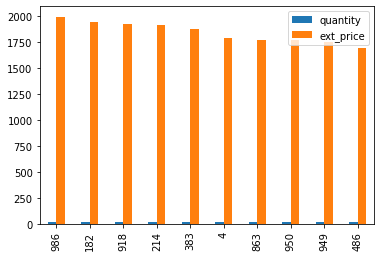

In [83]:
# Graph the top 10 shirt sales
subset_tshirts.sort_values(by=["ext_price"], ascending=False)[:10][["quantity", "ext_price"]].plot(kind='bar')